In [13]:
# Import pandas
import pandas as pd
# Import numpy
import numpy as np
# Import matplotlib
import matplotlib.pyplot as plt
# Import seaborn
import seaborn as sn
# Import stats
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [14]:
# Reading the dataset
df = pd.read_csv("/Users/suleymanaygun/Desktop/2022-2023 Spring/MIS208/visualization/untitled folder/train.csv")

In [15]:
num_cols = len(df.columns)

# Assign column names
df.columns = ["col" + str(i) for i in range(1, num_cols+1)]

In [16]:
# Set the max shown columns to unlimited
pd.set_option('display.max_columns', None)

In [17]:
# Column & Row numbers
df.shape

(246007, 122)

In [18]:
# Calculate the percentage of missing values in each column of the df
null_percentage = df.isnull().sum() / len(df)

# Identify all the columns where the percentage of missing values is greater than 49%
null_cols = null_percentage[null_percentage > 0.49].index.tolist()

# Drop all the columns identified in the previous step from the df:
df = df.drop(null_cols, axis=1)

In [19]:
# Column & Row numbers
df.shape

(246007, 78)

In [20]:
# Calculate the percentage of missing values in each row of the df
null_percentage = df.isnull().sum(axis=1) / len(df.columns)

# Identify all the rows where the percentage of missing values is greater than 49%
null_rows = null_percentage[null_percentage > 0.49].index.tolist()

# Drop all the rows identified in the previous step from the df:
df = df.drop(null_rows, axis=0)

In [21]:
# Column & Row numbers
df.shape

(246007, 78)

In [22]:
# get data types of each column
dtypes = df.dtypes

# create 3 groups based on data types
continuous = []
binary = []
categorical = []
label = []

for col in df.columns:
    unique_values = df[col].unique()
    if len(unique_values) == 2 and set(unique_values) <= set([0, 1]):
        binary.append(col)
    elif dtypes[col] == object:
        categorical.append(col)
    else:
        continuous.append(col)


binary.remove("col122")
label.append("col122")

In [23]:
# print the 3 groups and their lengths
print("Continuous variables:", len(continuous), continuous)
print("Binary variables:", len(binary), binary)
print("Categorical variables:", len(categorical), categorical)
print("Label:", len(label), label)

Continuous variables: 32 ['col1', 'col2', 'col10', 'col13', 'col14', 'col26', 'col28', 'col35', 'col36', 'col38', 'col41', 'col42', 'col46', 'col54', 'col58', 'col59', 'col64', 'col67', 'col71', 'col73', 'col74', 'col81', 'col84', 'col86', 'col90', 'col91', 'col100', 'col110', 'col113', 'col114', 'col115', 'col119']
Binary variables: 32 ['col9', 'col16', 'col20', 'col21', 'col24', 'col25', 'col27', 'col29', 'col30', 'col34', 'col43', 'col47', 'col51', 'col53', 'col56', 'col63', 'col65', 'col66', 'col72', 'col76', 'col77', 'col82', 'col95', 'col98', 'col99', 'col101', 'col105', 'col106', 'col107', 'col109', 'col117', 'col121']
Categorical variables: 13 ['col6', 'col7', 'col15', 'col17', 'col31', 'col32', 'col45', 'col48', 'col68', 'col70', 'col94', 'col104', 'col118']
Label: 1 ['col122']


In [24]:
# create a label encoder object
le = LabelEncoder()

# loop through each categorical variable and encode it
for col in categorical:
    df[col] = le.fit_transform(df[col])

# move any variables with only two possible values to the binary group
for col in categorical:
    if len(df[col].unique()) == 2:
        categorical.remove(col)
        binary.append(col)

In [25]:
# Fill missing values in numerical columns with median of their respective groups
df[continuous] = df.groupby("col122")[continuous].apply(lambda x: x.fillna(x.median()))

# Fill missing values in categorical columns with mode of their respective groups
df[binary] = df.groupby("col122")[binary].apply(lambda x: x.fillna(x.mode().iloc[0]))
df[categorical] = df.groupby("col122")[categorical].apply(lambda x: x.fillna(x.mode().iloc[0]))

/var/folders/xb/2hx2hy_92z91dc1d83mwdk2r0000gn/T/ipykernel_75385/2341406419.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df[continuous] = df.groupby("col122")[continuous].apply(lambda x: x.fillna(x.median()))
/var/folders/xb/2hx2hy_92z91dc1d83mwdk2r0000gn/T/ipykernel_75385/2341406419.py:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warni

In [26]:
df["col122"].value_counts()

0    226147
1     19860
Name: col122, dtype: int64

In [27]:
df["col122"].value_counts(normalize=True)

0    0.919271
1    0.080729
Name: col122, dtype: float64

In [28]:
X = df.drop(['col122'], axis=1)
y = df['col122']

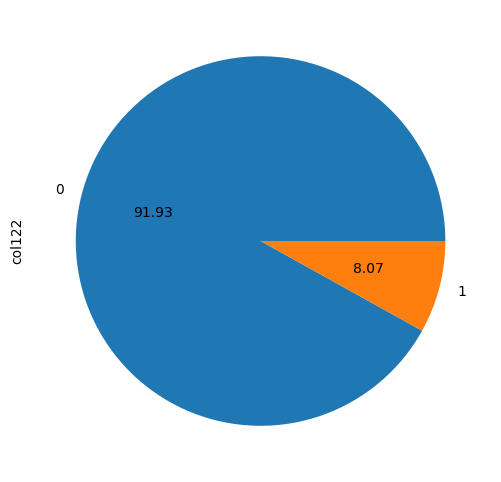

In [29]:
plt.figure(figsize=(6, 6))  # Adjust the figure size as per your preference
y.value_counts().plot.pie(autopct='%.2f')

# Display the plot
plt.show()

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Separate the majority and minority classes
df_majority = df[df['col122'] == 0]
df_minority = df[df['col122'] == 1]

# Upsample the minority class
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)

# Combine the upsampled minority class with the majority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# X: Features (input variables)
X = df_upsampled.drop('col122', axis=1)

# y: Label ('binary_label')
y = df_upsampled['col122']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.135976122, random_state=42)

# Create a Random Forest classifier with default parameters
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9997073265910051
Precision: 0.9994184919558053
Recall: 1.0
F1-score: 0.9997091614154144


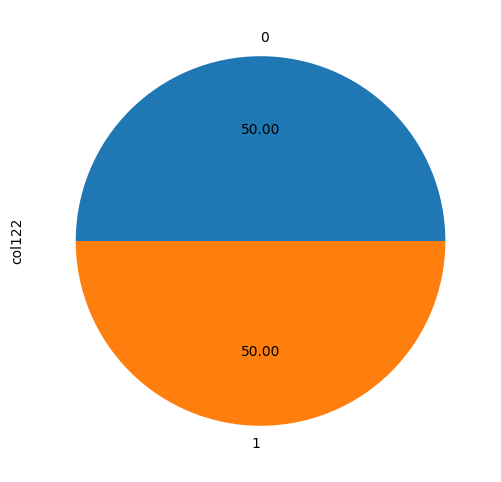

In [31]:
plt.figure(figsize=(6, 6))  # Adjust the figure size as per your preference
y.value_counts().plot.pie(autopct='%.2f')

# Display the plot
plt.show()

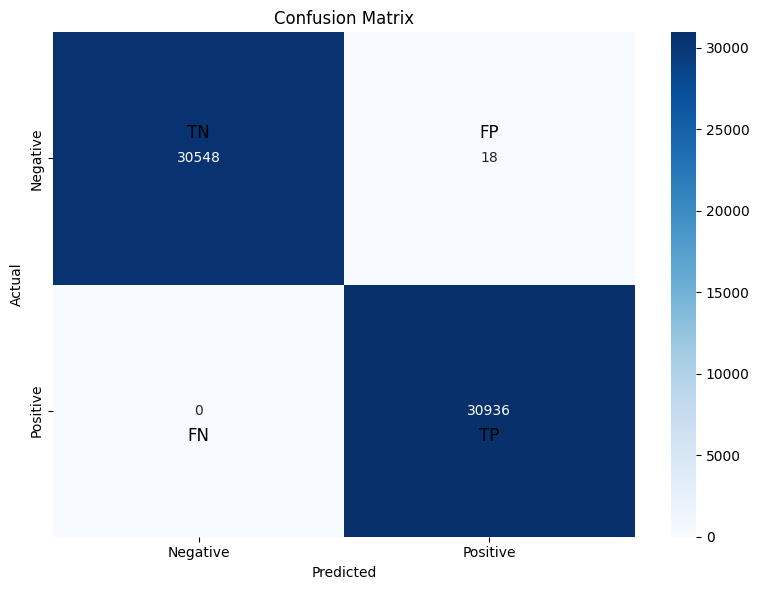

In [32]:
from sklearn.metrics import confusion_matrix
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))  # Adjust the figure size as per your preference
sn.heatmap(cm, annot=True, cmap='Blues', fmt='d')

# Set labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=['Negative', 'Positive'])  # Adjust the tick labels according to your classes
plt.yticks(ticks=[0.5, 1.5], labels=['Negative', 'Positive'])  # Adjust the tick labels according to your classes

# Add text annotations for TN, FN, FP, TP
plt.text(0.5, 0.4, f'TN', ha='center', va='center', fontsize=12, color='black')
plt.text(0.5, 1.6, f'FN', ha='center', va='center', fontsize=12, color='black')
plt.text(1.5, 0.4, f'FP', ha='center', va='center', fontsize=12, color='black')
plt.text(1.5, 1.6, f'TP', ha='center', va='center', fontsize=12, color='black')

# Display the plot
plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()

In [33]:
# Detect the null values for each column and distribute the null values to existing values according to their ratio:
for col_dist in df.columns:
    null_indices = df[col_dist].isnull()
    fill_values = df[col_dist].value_counts(normalize=True)
    df.loc[null_indices, col_dist] = np.random.choice(fill_values.index, size=null_indices.sum(), p=fill_values.values)

In [34]:
# Delete the row is there are more than 95% same value:
for col in df.columns:
    frequencies = df[col].value_counts()
    topfreq = frequencies.iloc[0]
    sum = len(df[col])
    similarity = topfreq / sum
    threshold = 0.95
    if similarity > threshold:
        df = df.drop(columns=[col])

In [35]:
# Column & Row numbers
df.shape

(246007, 54)

In [36]:
# Calculate the correlation matrix
corr_matrix = df.corr().round(2)

# Filter the matrix to show only the values that meet the condition
corr_filtered = corr_matrix[(corr_matrix > 0.80) | (corr_matrix < -0.80)]

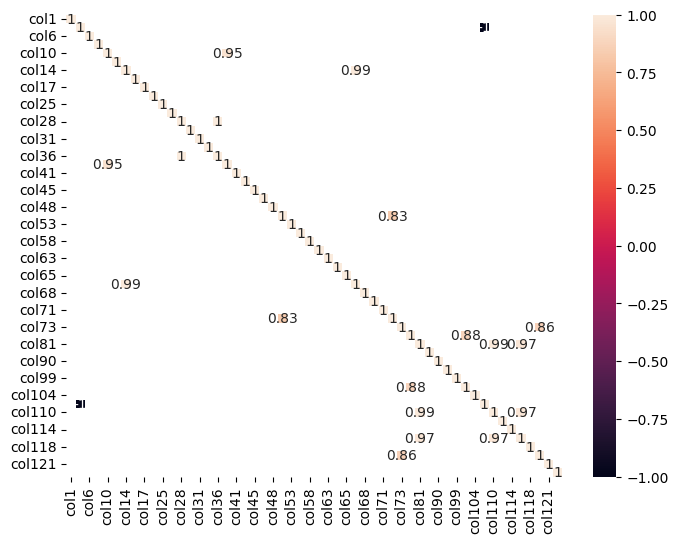

In [37]:
# Plot the filtered correlation matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))  # Adjust the figure size as desired
sn.heatmap(corr_filtered, annot=True)
plt.show()

In [38]:
# Identify highly correlated feature pairs based on the threshold
high_corr_pairs = []
threshold = 0.8
for i in range(len(df.columns)):
    for j in range(i+1, len(df.columns)):
        if corr_matrix.iloc[i,j] >= threshold:
            high_corr_pairs.append((df.columns[i], df.columns[j]))

In [39]:
# Drop one feature from each highly correlated pair with priority given to continuous features
for pair in high_corr_pairs:
    if pair[0] in df.columns and pair[1] in df.columns:
        if pair[0] in continuous:
            df = df.drop(pair[1], axis=1)
        elif pair[1] in continuous:
            df = df.drop(pair[0], axis=1)
        else:
            vif_pair_0 = variance_inflation_factor(df.values, df.columns.get_loc(pair[0]))
            vif_pair_1 = variance_inflation_factor(df.values, df.columns.get_loc(pair[1]))
            if vif_pair_0 >= vif_pair_1:
                df = df.drop(pair[1], axis=1)
            else:
                df = df.drop(pair[0], axis=1)

In [40]:
# Group the features based on the number of unique values
continuous_feats = []
categorical_feats = []
binary_feats = []
label = []

for col in df.columns:
    if df[col].nunique() == 2:
        binary_feats.append(col)
    elif df[col].nunique() > 30:
        continuous_feats.append(col)
    else:
        categorical_feats.append(col)

binary_feats.remove("col122")
label.append("col122")

In [41]:
print("Continuous Features: ", continuous_feats)
print("Categorical Features: ", categorical_feats)
print("Binary Features: ", binary_feats)
print("Label Features", label)

Continuous Features:  ['col1', 'col2', 'col7', 'col14', 'col26', 'col28', 'col41', 'col54', 'col58', 'col59', 'col64', 'col71', 'col81', 'col86', 'col90', 'col114']
Categorical Features:  ['col10', 'col13', 'col15', 'col17', 'col31', 'col32', 'col42', 'col45', 'col46', 'col68', 'col70', 'col73', 'col74', 'col94', 'col113', 'col118']
Binary Features:  ['col6', 'col21', 'col25', 'col30', 'col48', 'col53', 'col63', 'col65', 'col72', 'col99', 'col104', 'col105', 'col121']
Label Features ['col122']


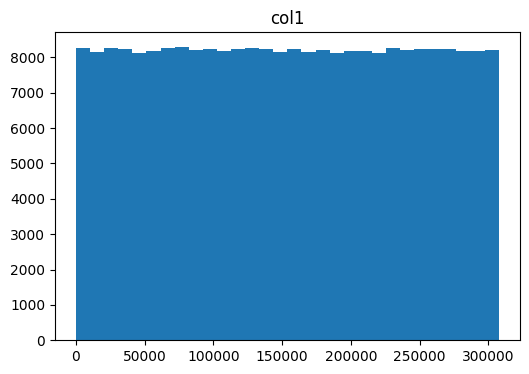

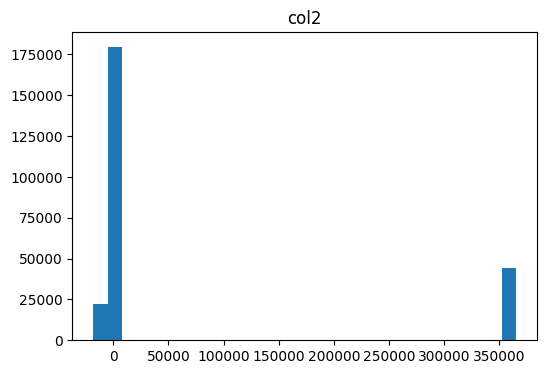

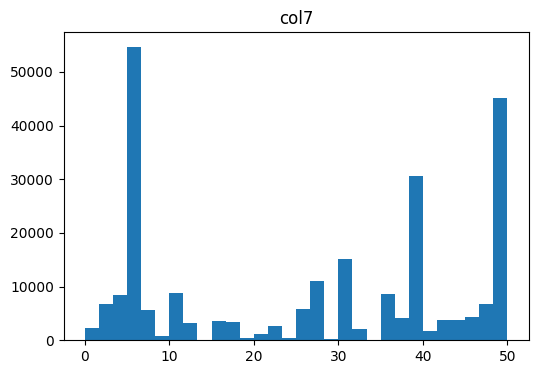

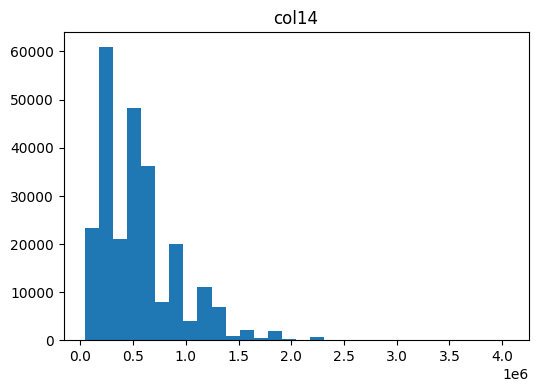

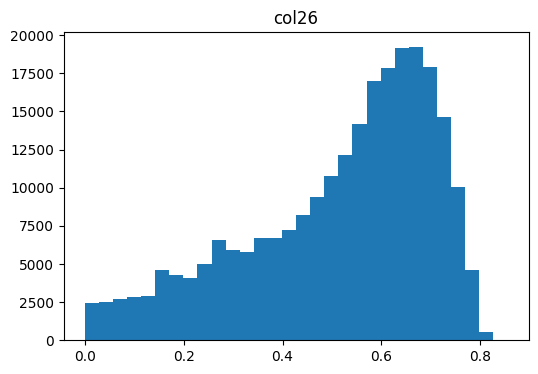

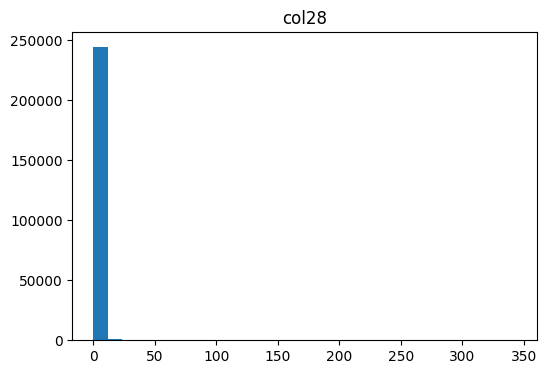

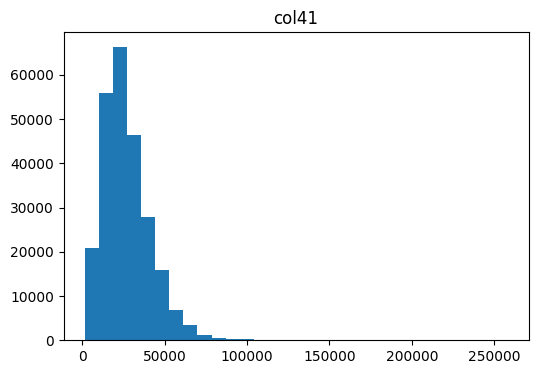

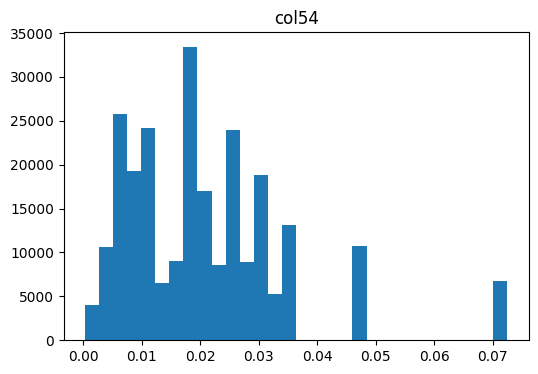

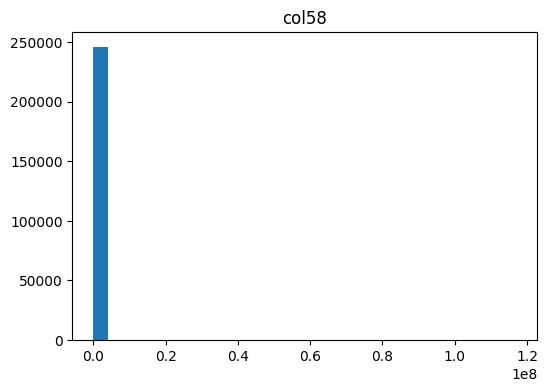

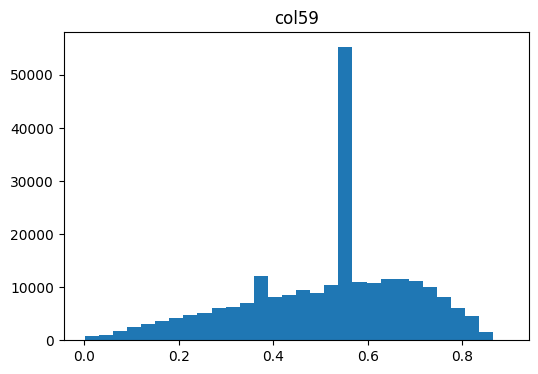

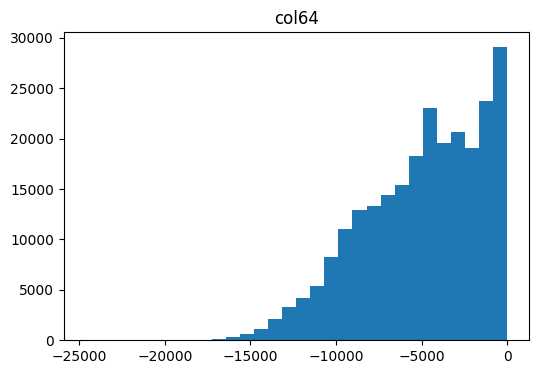

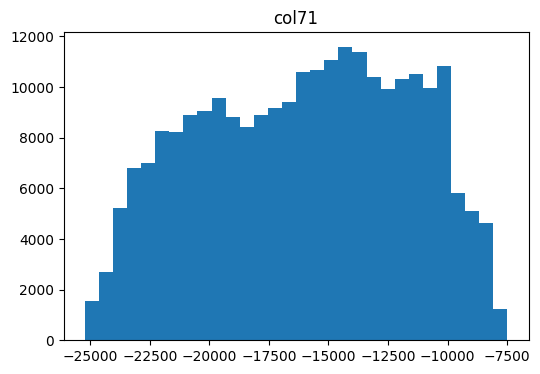

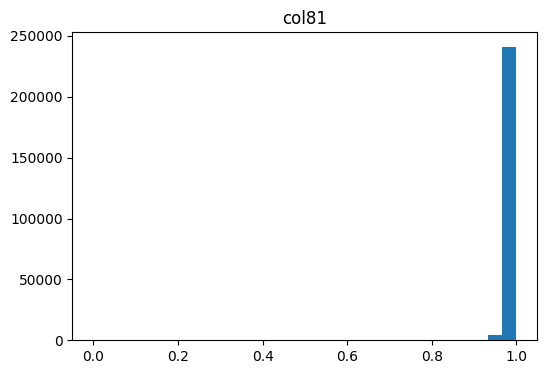

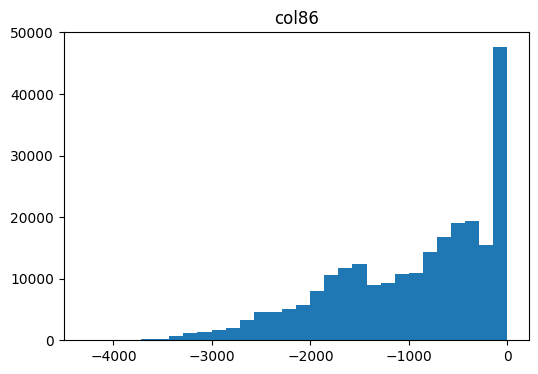

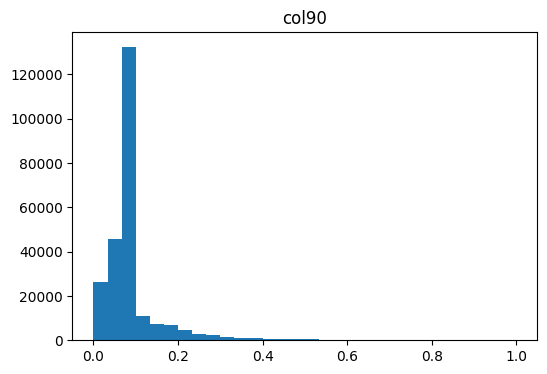

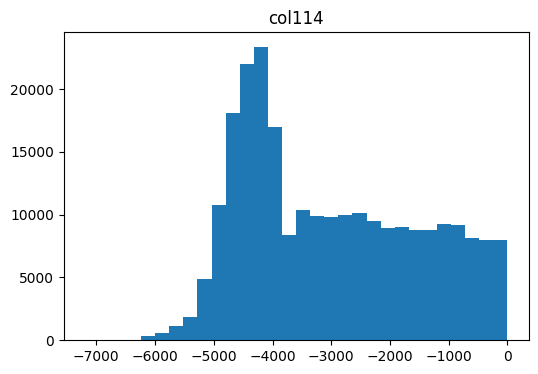

In [42]:
# Plot histograms for continuous features
for col in continuous_feats:
    plt.figure(figsize=(6,4)) # Set the figure size to 6 inches by 4 inches
    plt.hist(df[col], bins=30)
    plt.title(col)
    plt.show()

/var/folders/xb/2hx2hy_92z91dc1d83mwdk2r0000gn/T/ipykernel_75385/1686107775.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sn.kdeplot(df[col], shade=True)


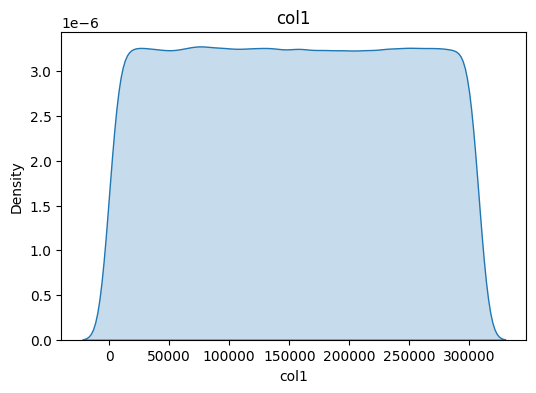

/var/folders/xb/2hx2hy_92z91dc1d83mwdk2r0000gn/T/ipykernel_75385/1686107775.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sn.kdeplot(df[col], shade=True)


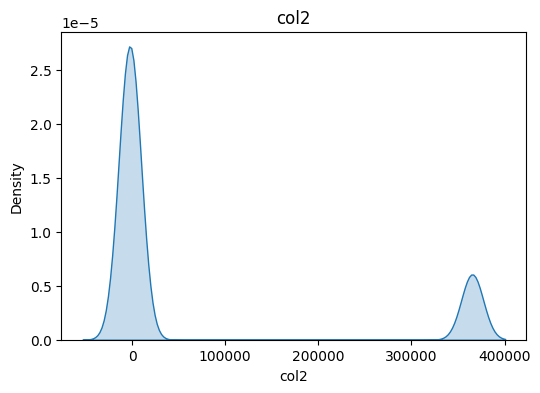

/var/folders/xb/2hx2hy_92z91dc1d83mwdk2r0000gn/T/ipykernel_75385/1686107775.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sn.kdeplot(df[col], shade=True)


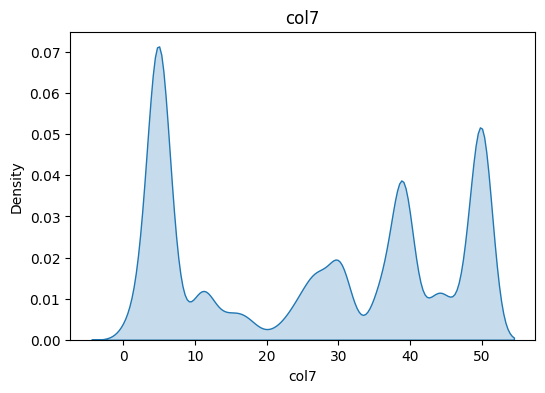

/var/folders/xb/2hx2hy_92z91dc1d83mwdk2r0000gn/T/ipykernel_75385/1686107775.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sn.kdeplot(df[col], shade=True)


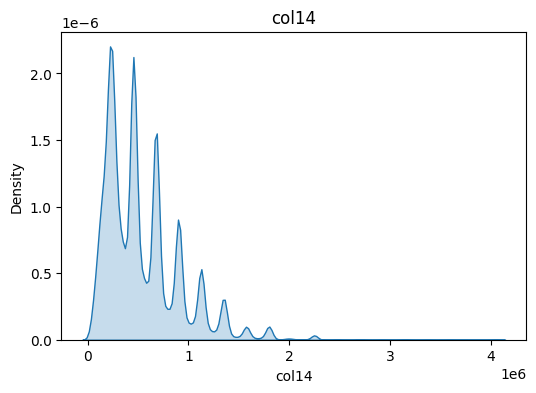

/var/folders/xb/2hx2hy_92z91dc1d83mwdk2r0000gn/T/ipykernel_75385/1686107775.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sn.kdeplot(df[col], shade=True)


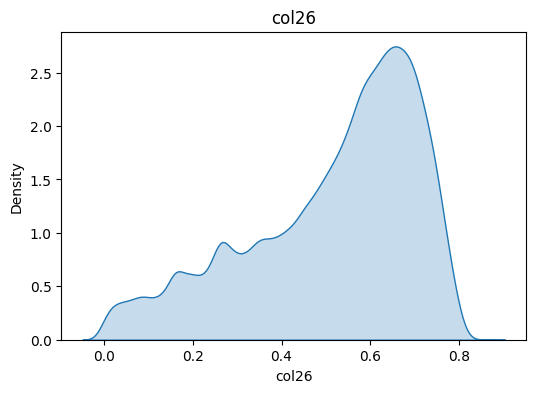

/var/folders/xb/2hx2hy_92z91dc1d83mwdk2r0000gn/T/ipykernel_75385/1686107775.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sn.kdeplot(df[col], shade=True)


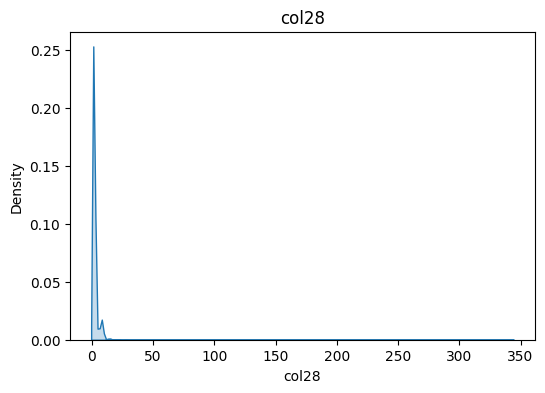

/var/folders/xb/2hx2hy_92z91dc1d83mwdk2r0000gn/T/ipykernel_75385/1686107775.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sn.kdeplot(df[col], shade=True)


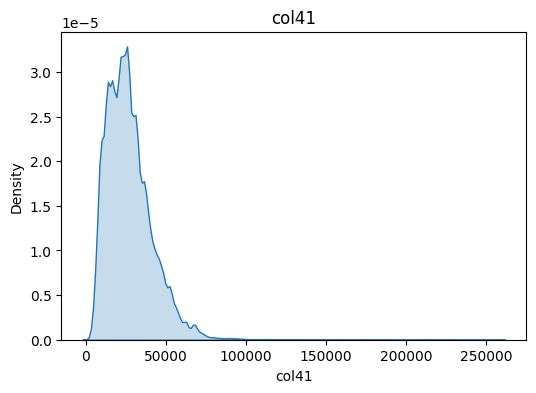

/var/folders/xb/2hx2hy_92z91dc1d83mwdk2r0000gn/T/ipykernel_75385/1686107775.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sn.kdeplot(df[col], shade=True)


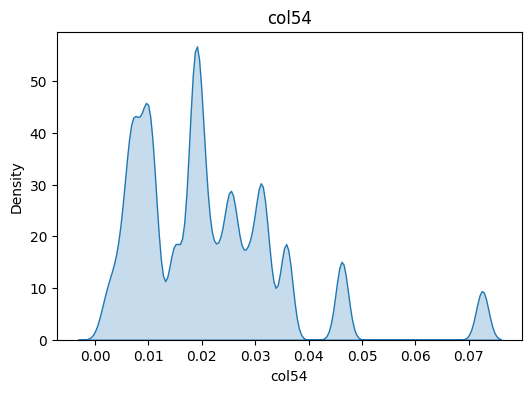

/var/folders/xb/2hx2hy_92z91dc1d83mwdk2r0000gn/T/ipykernel_75385/1686107775.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sn.kdeplot(df[col], shade=True)


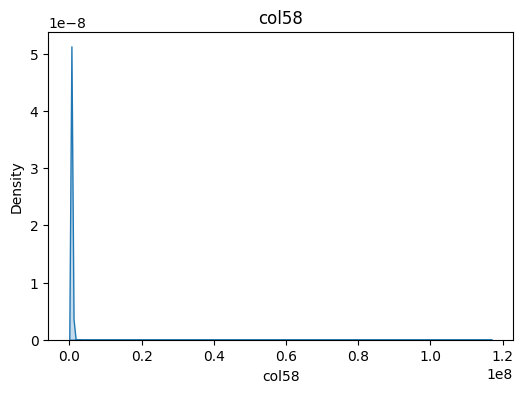

/var/folders/xb/2hx2hy_92z91dc1d83mwdk2r0000gn/T/ipykernel_75385/1686107775.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sn.kdeplot(df[col], shade=True)


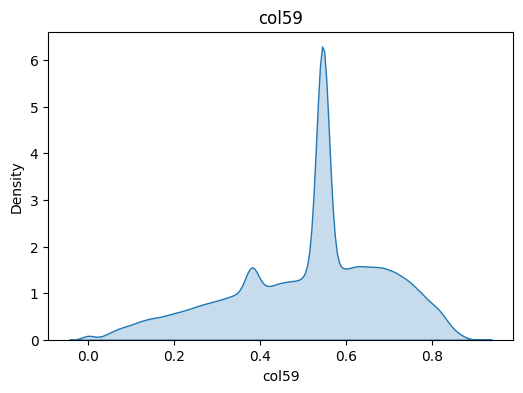

/var/folders/xb/2hx2hy_92z91dc1d83mwdk2r0000gn/T/ipykernel_75385/1686107775.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sn.kdeplot(df[col], shade=True)


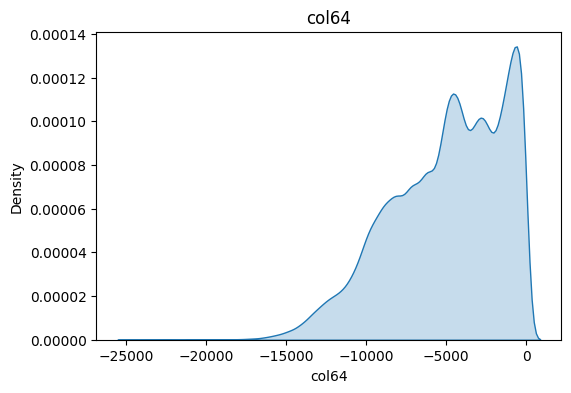

/var/folders/xb/2hx2hy_92z91dc1d83mwdk2r0000gn/T/ipykernel_75385/1686107775.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sn.kdeplot(df[col], shade=True)


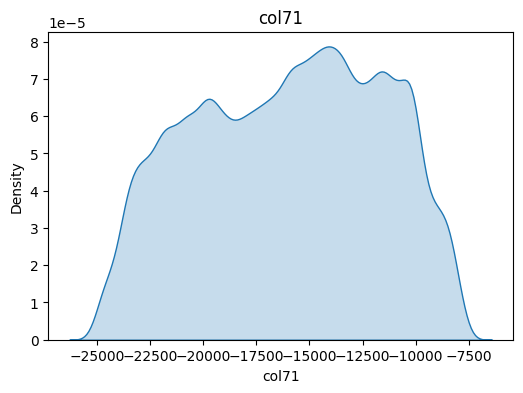

/var/folders/xb/2hx2hy_92z91dc1d83mwdk2r0000gn/T/ipykernel_75385/1686107775.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sn.kdeplot(df[col], shade=True)


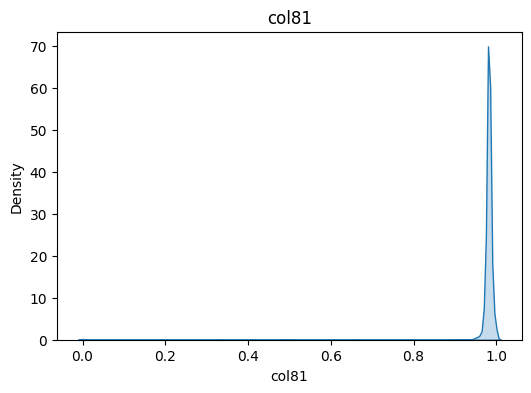

/var/folders/xb/2hx2hy_92z91dc1d83mwdk2r0000gn/T/ipykernel_75385/1686107775.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sn.kdeplot(df[col], shade=True)


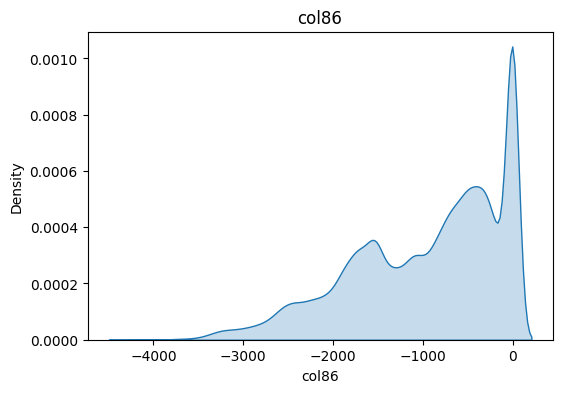

/var/folders/xb/2hx2hy_92z91dc1d83mwdk2r0000gn/T/ipykernel_75385/1686107775.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sn.kdeplot(df[col], shade=True)


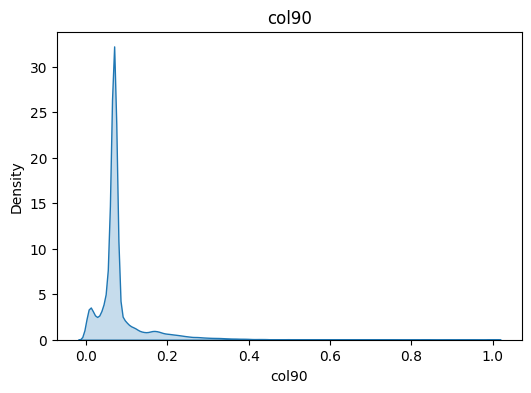

/var/folders/xb/2hx2hy_92z91dc1d83mwdk2r0000gn/T/ipykernel_75385/1686107775.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sn.kdeplot(df[col], shade=True)


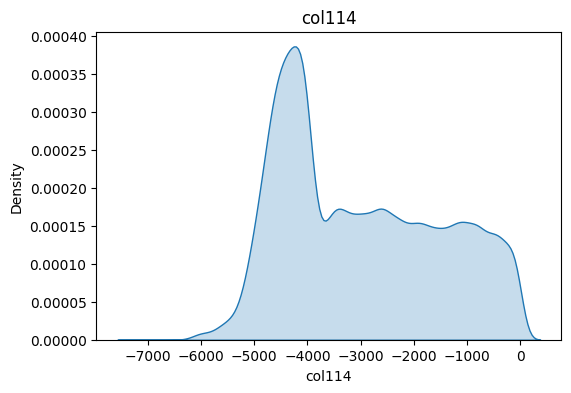

In [43]:
# Plot density plots for continuous features
for col in continuous_feats:
    plt.figure(figsize=(6,4)) # Set the figure size to 6 inches by 4 inches
    sn.kdeplot(df[col], shade=True)
    plt.title(col)
    plt.show()

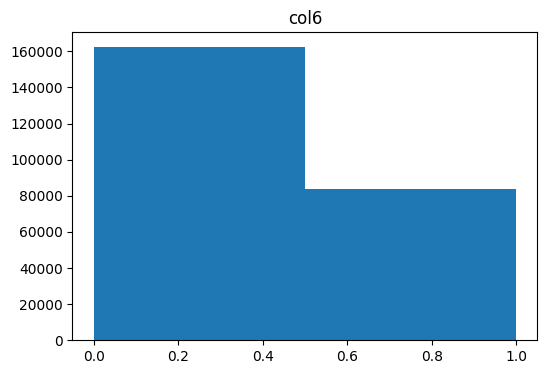

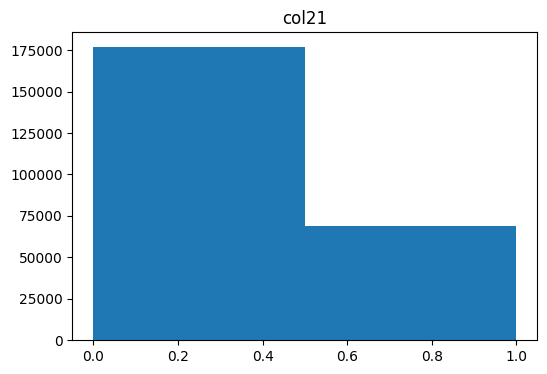

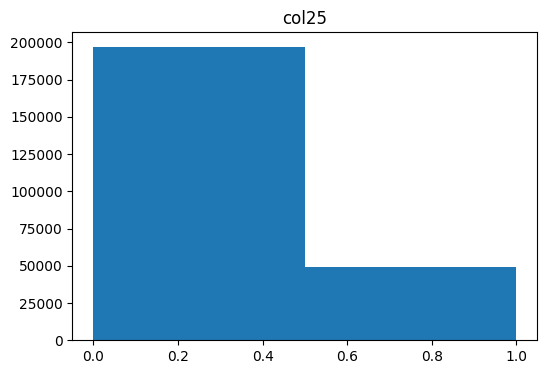

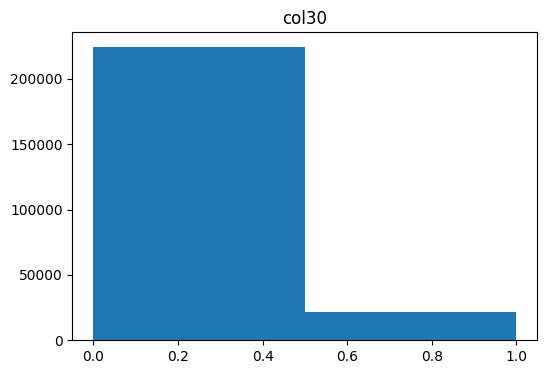

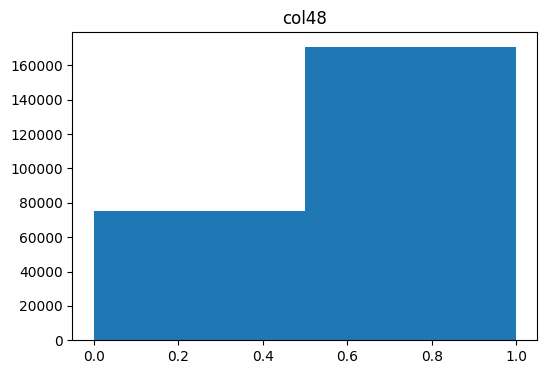

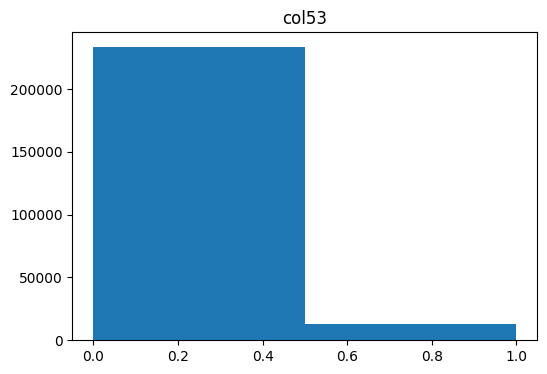

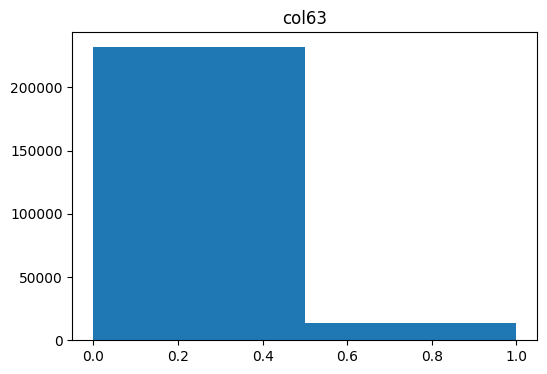

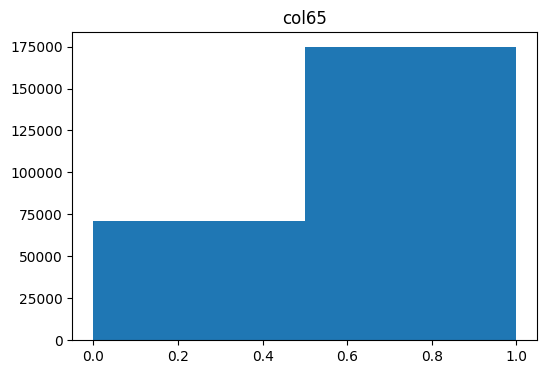

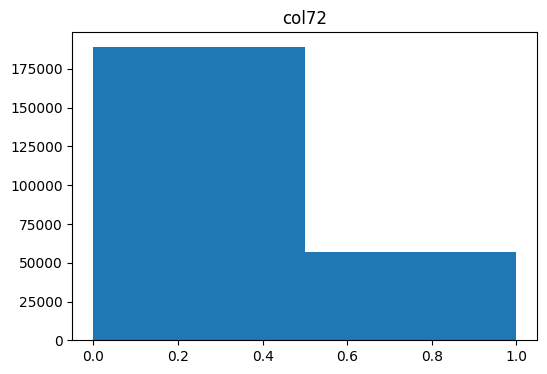

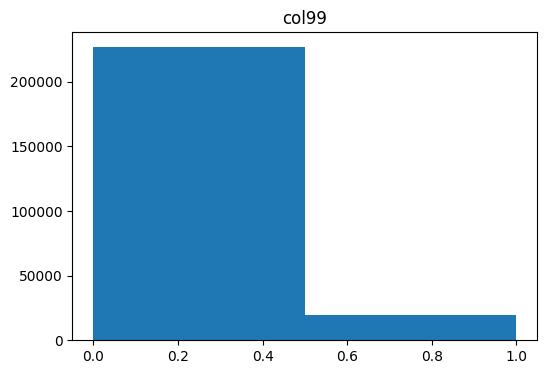

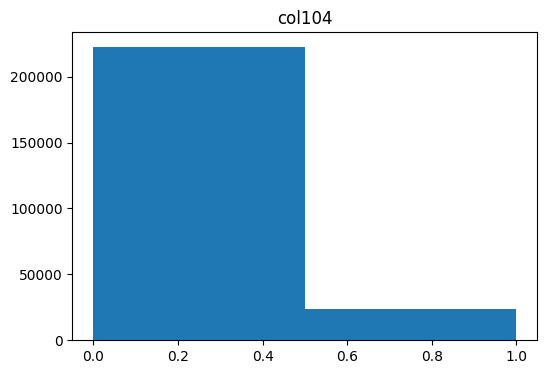

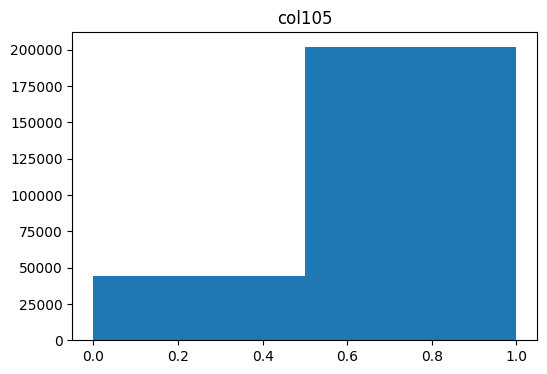

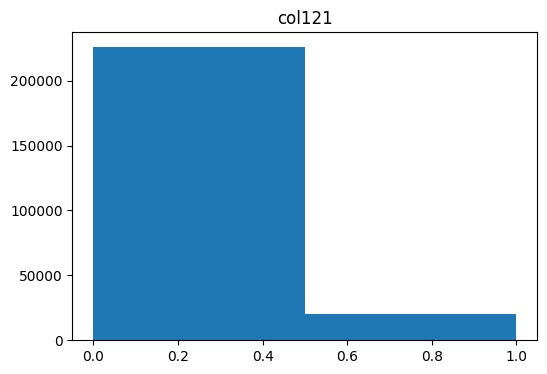

In [44]:
for feature in binary_feats:
    plt.figure(figsize=(6,4)) # Set the figure size to 6 inches by 4 inches
    plt.hist(df[feature], bins=2)
    plt.title(feature)
    plt.show()

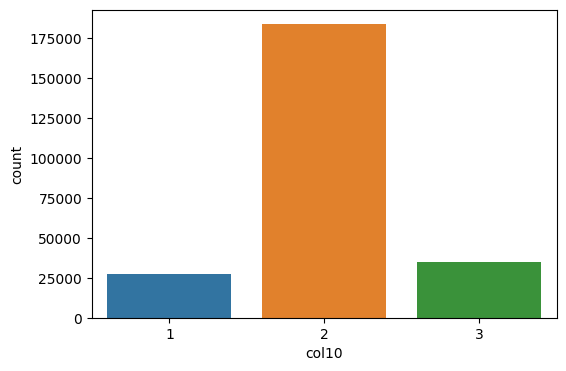

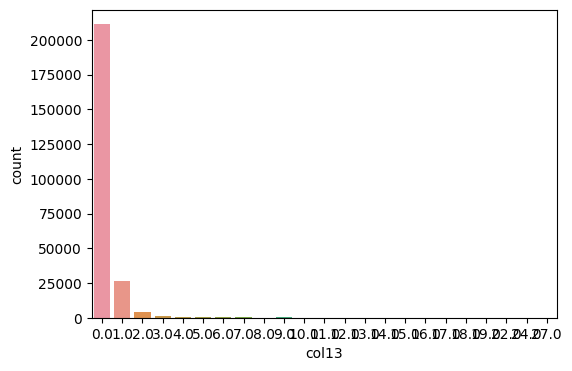

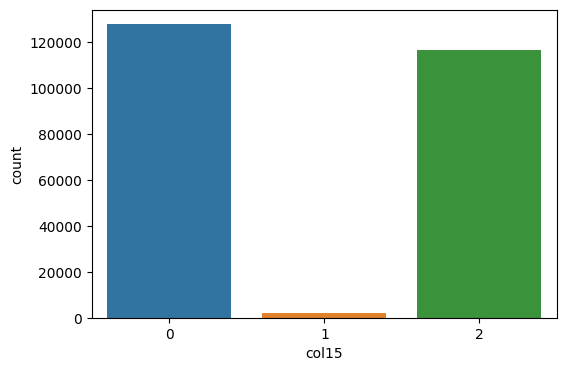

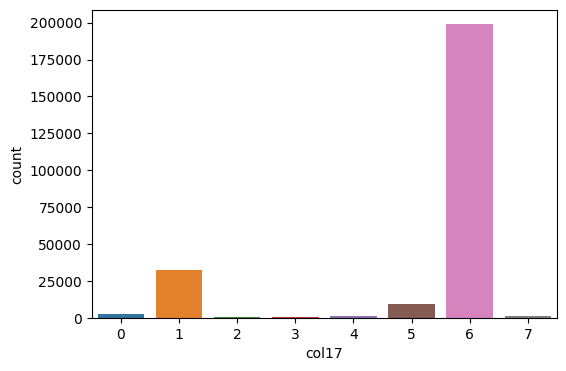

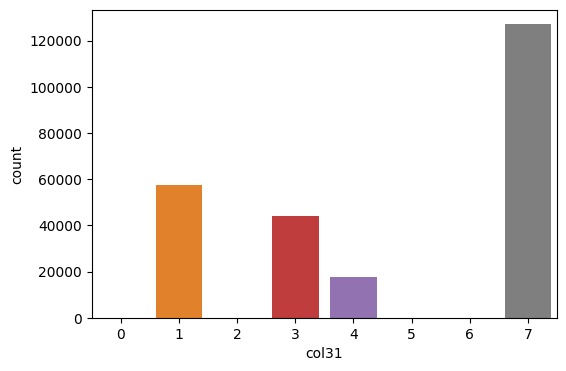

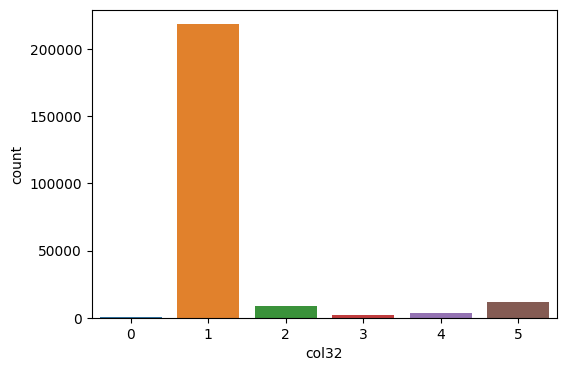

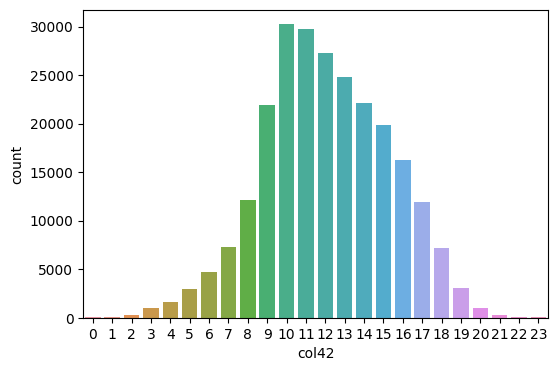

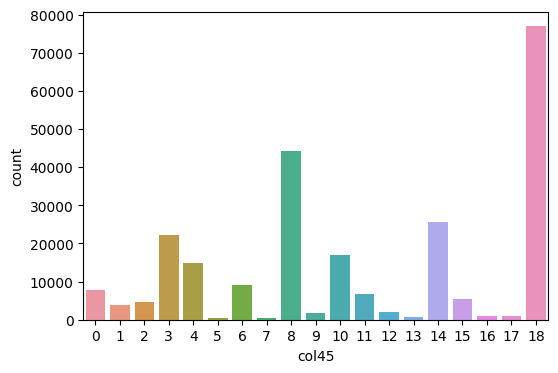

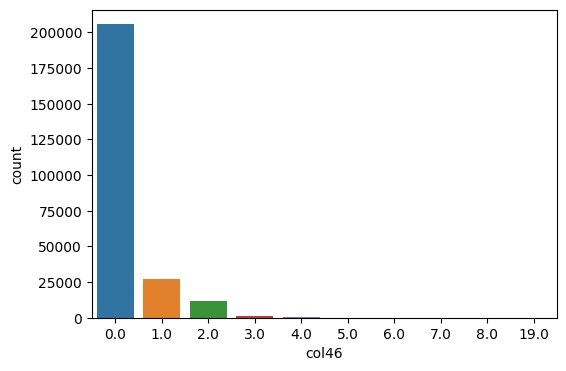

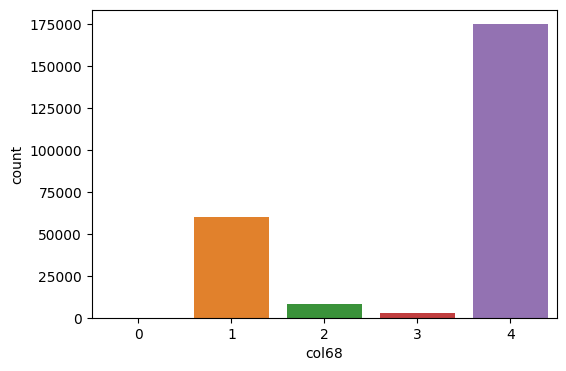

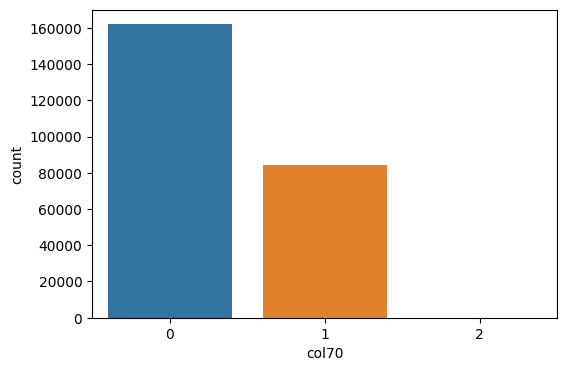

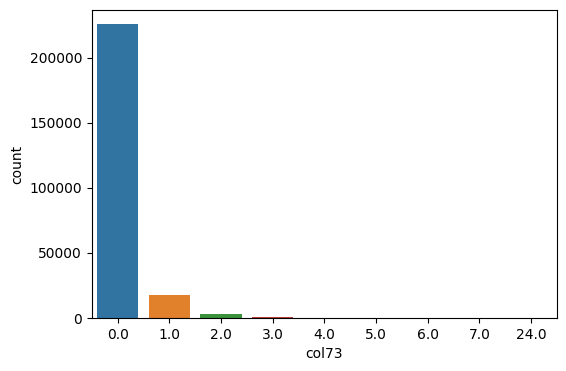

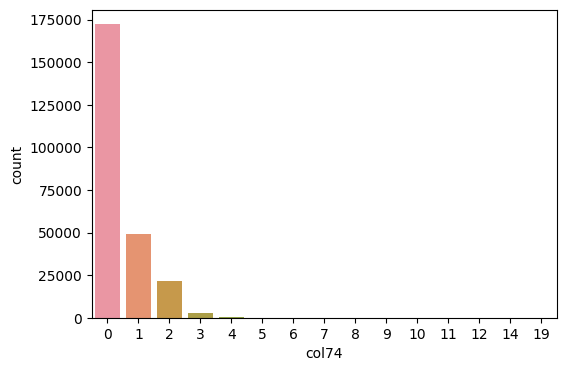

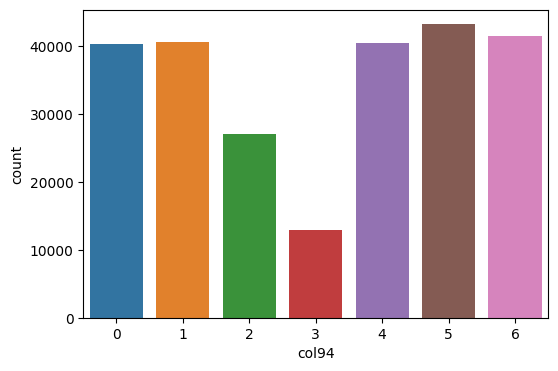

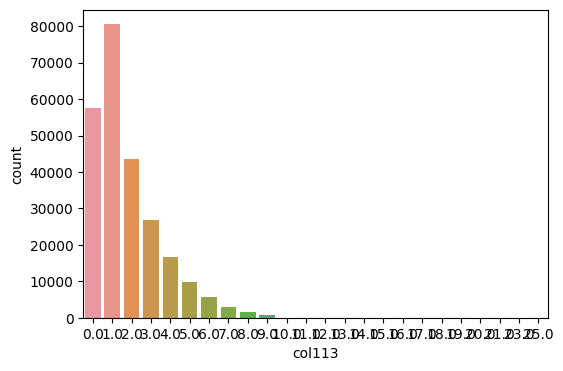

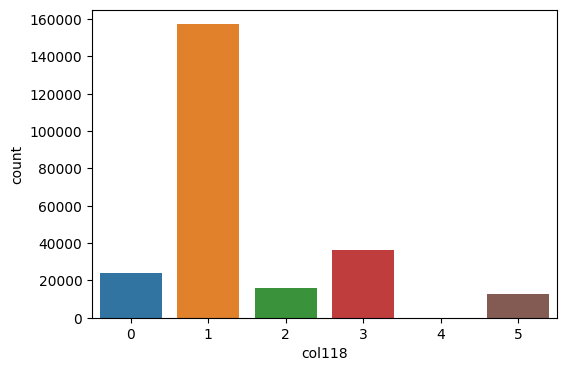

In [45]:
for feature in categorical_feats:
    plt.figure(figsize=(6,4)) # Set the figure size to 6 inches by 4 inches
    sn.countplot(x=feature, data=df)
    plt.show()

In [46]:
df.shape

(246007, 46)

In [47]:
df.isna().sum().sum()

0

In [48]:
df.head(20)

,col1,col2,col6,col7,col10,col13,col14,col15,col17,col21,col25,col26,col28,col30,col31,col32,col41,col42,col45,col46,col48,col53,col54,col58,col59,col63,col64,col65,col68,col70,col71,col72,col73,col74,col81,col86,col90,col94,col99,col104,col105,col113,col114,col118,col121,col122
0,236977,-92,1,30,3,0.0,135000.0,2,6,0,0,0.514261,2.0,0,1,1,13095.0,13,4,0.0,1,0,0.003069,90000.0,0.546023,0,-1292.0,1,4,1,-15375,1,0.0,0,0.9821,-509.0,0.0691,5,0,0,1,1.0,-1994,1,0,0
1,168821,-1646,0,5,2,0.0,553500.0,0,5,1,0,0.486906,1.0,0,7,1,26307.0,5,8,0.0,1,0,0.020713,135000.0,0.598926,0,-7951.0,1,4,1,-19307,0,0.0,0,0.9891,-1474.0,0.1269,5,0,0,1,2.0,-2842,3,0,1
2,94708,-1651,0,5,2,0.0,391500.0,0,6,1,0,0.675705,2.0,0,1,1,34636.5,10,8,0.0,0,0,0.011703,135000.0,0.454321,0,-1033.0,1,4,1,-17791,0,0.0,0,0.9682,-2016.0,0.0065,5,0,0,1,4.0,-1345,3,0,1
3,84556,-977,0,35,2,0.0,225000.0,2,6,0,0,0.154565,0.0,0,1,1,27558.0,5,0,0.0,1,0,0.006629,180000.0,0.546023,0,-2873.0,1,2,0,-8486,0,0.0,0,0.9821,-695.0,0.0691,1,0,0,1,1.0,-852,3,0,0
4,114510,365243,0,50,2,3.0,225000.0,0,6,1,0,0.627827,5.0,0,3,1,11250.0,13,18,1.0,1,0,0.031329,74250.0,0.643026,0,-10391.0,0,1,0,-22373,0,0.0,0,0.9861,-399.0,0.1338,4,0,1,0,2.0,-4138,1,0,0
5,237407,-2285,1,44,2,0.0,360000.0,0,6,0,0,0.641732,2.0,0,7,1,13842.0,15,4,0.0,0,0,0.019689,157500.0,0.263647,0,-756.0,1,4,1,-14763,0,1.0,1,0.9747,-429.0,0.0494,5,0,0,1,0.0,-4328,0,0,0
6,250624,-1432,0,39,2,0.0,1179000.0,2,6,0,0,0.548786,0.0,0,1,1,39609.0,16,14,0.0,1,0,0.018634,202500.0,0.546023,0,-11130.0,1,4,0,-13257,0,0.0,1,0.9821,-136.0,0.0691,5,1,0,1,1.0,-4177,1,0,0
7,135815,-1380,0,30,2,1.0,225000.0,0,6,1,1,0.639925,0.0,0,1,1,10953.0,15,14,0.0,0,0,0.026392,81000.0,0.438281,0,-1478.0,1,4,0,-9940,0,0.0,1,0.9925,-648.0,0.1234,0,0,0,1,0.0,-2614,0,0,0
8,109487,-140,1,1,2,0.0,135000.0,2,5,0,0,0.328076,0.0,0,1,1,6750.0,9,6,0.0,1,0,0.025164,112500.0,0.638044,0,-1042.0,0,4,1,-21332,1,0.0,0,0.9821,-1236.0,0.0691,5,0,1,1,6.0,-4876,1,0,0
9,72872,-119,0,11,2,0.0,720000.0,2,5,0,0,0.694022,2.0,0,7,1,45625.5,14,18,0.0,1,0,0.010643,180000.0,0.546023,0,-2901.0,1,4,1,-9970,1,1.0,0,0.9821,-948.0,0.0691,2,1,0,1,1.0,-2076,1,0,0


In [49]:
# Creating a new csv file with last version
df.to_csv('df.csv', index=False)